# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To get same results everytime you run the notebook
import os
import random
state = 74
os.environ['PYTHONHASHSEED'] = str(state)
random.seed(state)
np.random.seed(state)

# Read the dataset 

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)
df = pd.read_csv('car data.csv')
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
df = df.drop(['Car_Name'], axis = 1)
df.shape

(301, 8)

# Exploratory Data Analysis 

In [5]:
# Age of the car
df['Car_age'] = 2021 - df['Year']
df.drop(['Year'], axis = 1, inplace = True)

In [6]:
# No null values present
df.isnull().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Car_age          0
dtype: int64

In [7]:
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age
count,301.00,301.00,301.00,301.00,301.00
mean,4.66,7.63,36947.21,0.04,7.37
std,5.08,8.64,38886.88,0.25,2.89
min,0.10,0.32,500.00,0.00,3.00
25%,0.90,1.20,15000.00,0.00,5.00
50%,3.60,6.40,32000.00,0.00,7.00
75%,6.00,9.90,48767.00,0.00,9.00
max,35.00,92.60,500000.00,3.00,18.00


In [8]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size':14})

## Categorical Features 

In [9]:
cat = [x for x in df.columns if df[x].dtype == 'O']

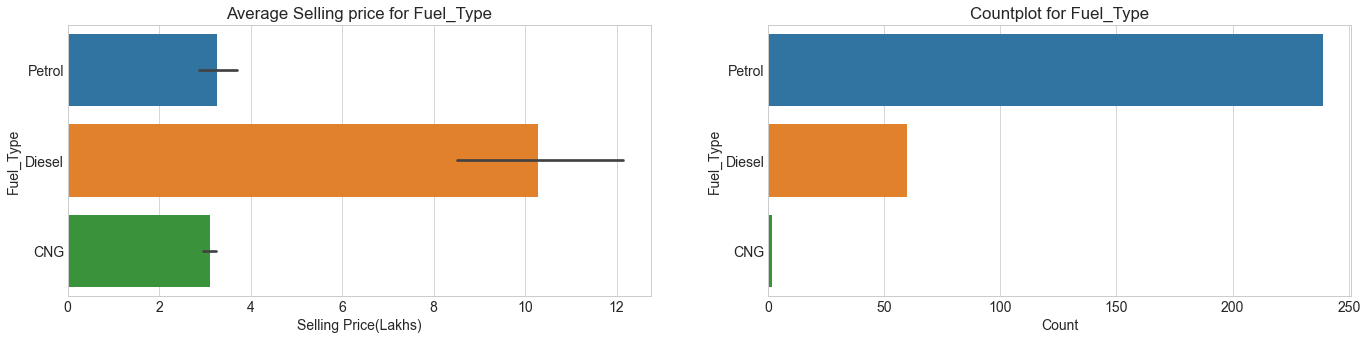

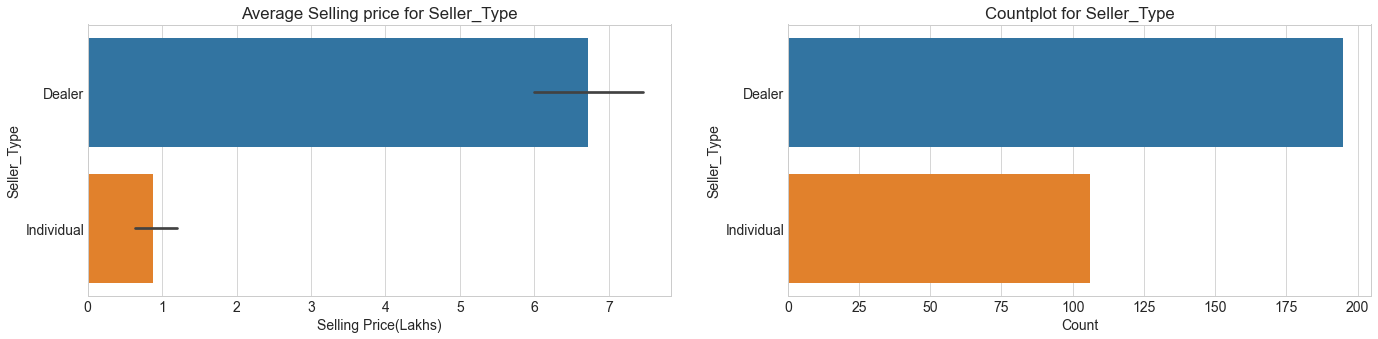

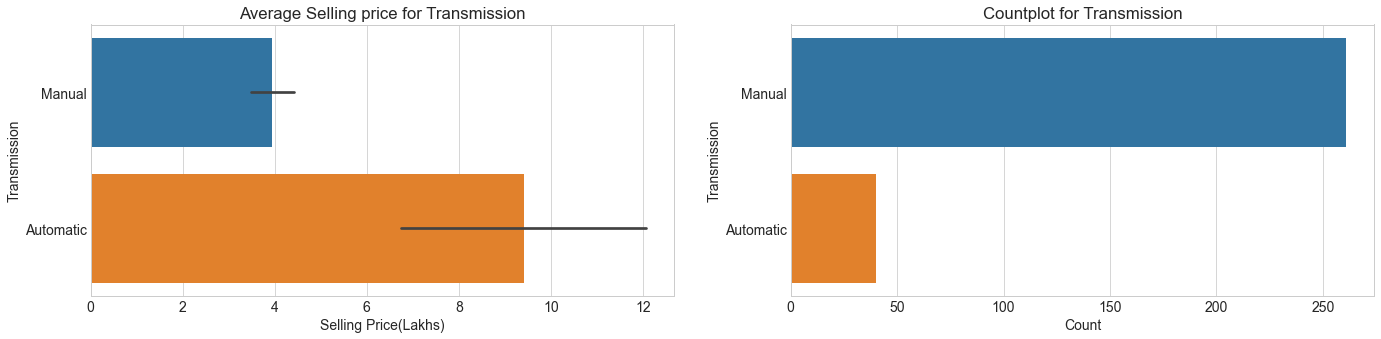

In [10]:
for f in cat:
    plt.figure(figsize = (23, 5))
    plt.subplot(1,2,1)
    sns.barplot(x = df['Selling_Price'], y = df[f])
    plt.xlabel('Selling Price(Lakhs)')
    plt.ylabel(f)
    plt.title('Average Selling price for '+f)
    
    plt.subplot(1,2,2)
    sns.countplot(y = df[f])
    plt.xlabel('Count')
    plt.ylabel(f)
    plt.title('Countplot for '+f)
    plt.show()

## Numerical Features 

In [11]:
cont = ['Present_Price', 'Kms_Driven']
disc = ['Owner', 'Car_age']

#### Discrete Features 

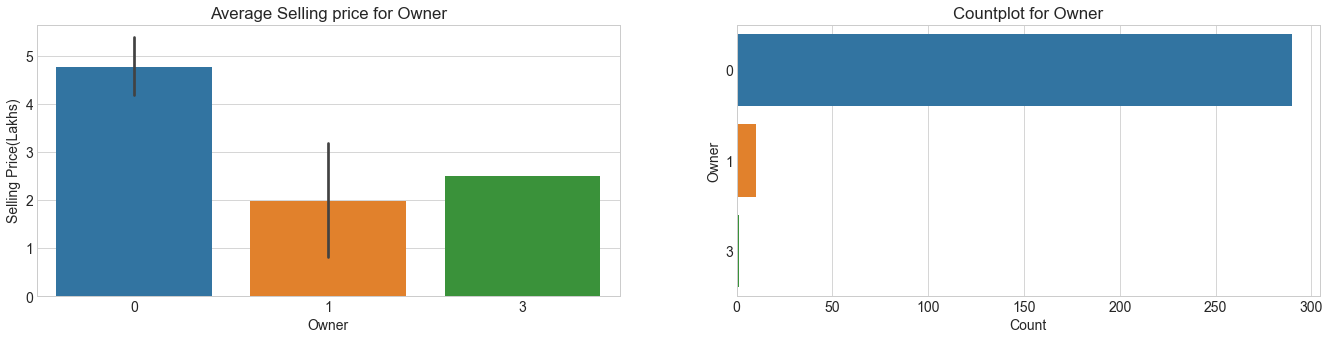

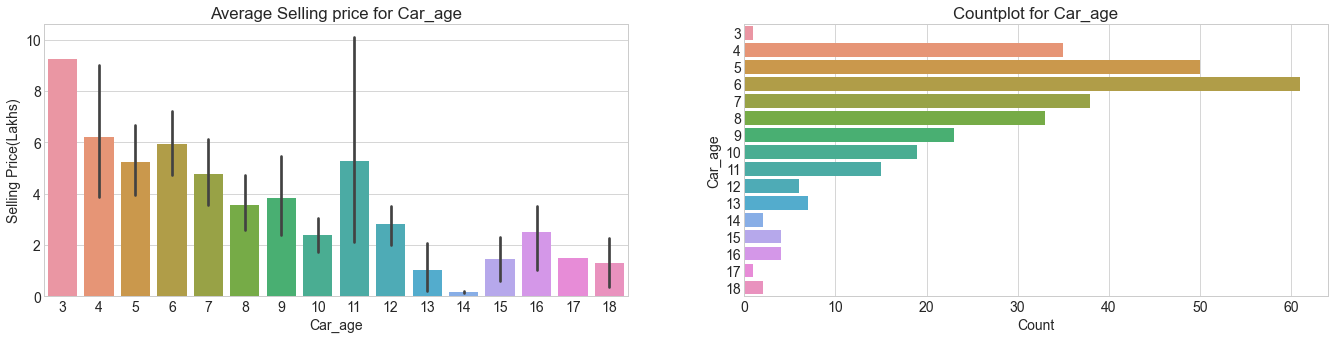

In [12]:
for f in disc:
    plt.figure(figsize = (23, 5))
    plt.subplot(1,2,1)
    sns.barplot(y = df['Selling_Price'], x = df[f])
    plt.ylabel('Selling Price(Lakhs)')
    plt.xlabel(f)
    plt.title('Average Selling price for '+f)
    
    plt.subplot(1,2,2)
    sns.countplot(y = df[f])
    plt.xlabel('Count')
    plt.ylabel(f)
    plt.title('Countplot for '+f)
    plt.show()

#### Continuous Features 

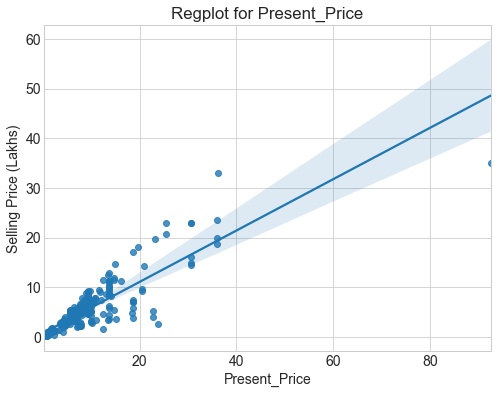

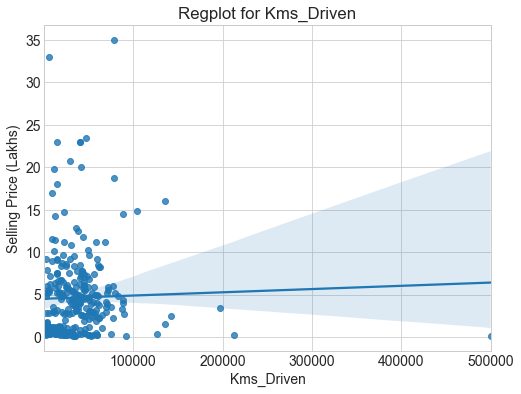

In [13]:
for f in cont:
    plt.figure(figsize = (8, 6))
    sns.regplot(y = df['Selling_Price'], x = df[f])
    plt.ylabel('Selling Price (Lakhs)')
    plt.xlabel(f)
    plt.title('Regplot for '+f)
    plt.show()

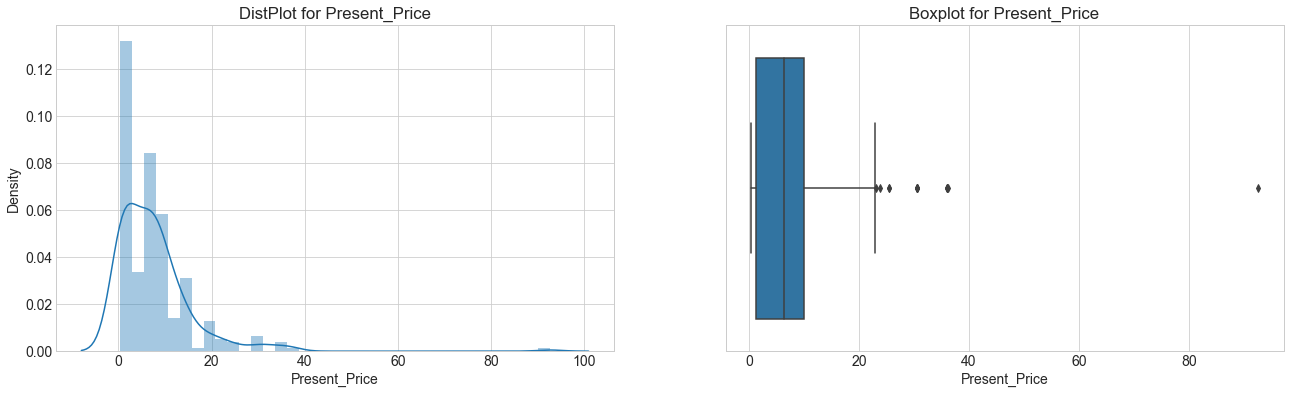

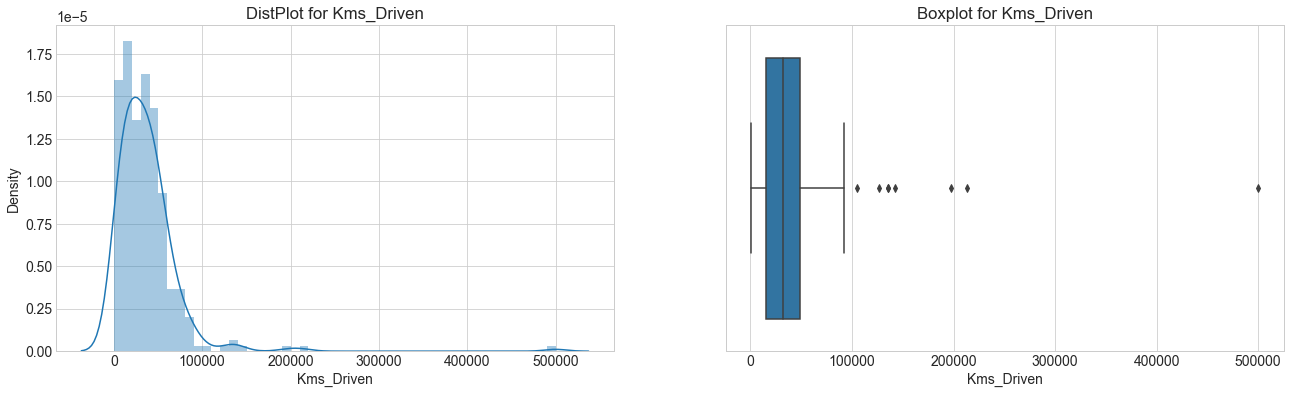

In [14]:
for f in cont:
    plt.figure(figsize = (22, 6))
    plt.subplot(1,2,1)
    sns.distplot(x = df[f])
    plt.xlabel(f)
    plt.title('DistPlot for '+f)
    
    plt.subplot(1,2,2)
    sns.boxplot(x = df[f])
    plt.xlabel(f)
    plt.title('Boxplot for '+f)
    plt.show()

### Correlation Matrix 

<AxesSubplot:>

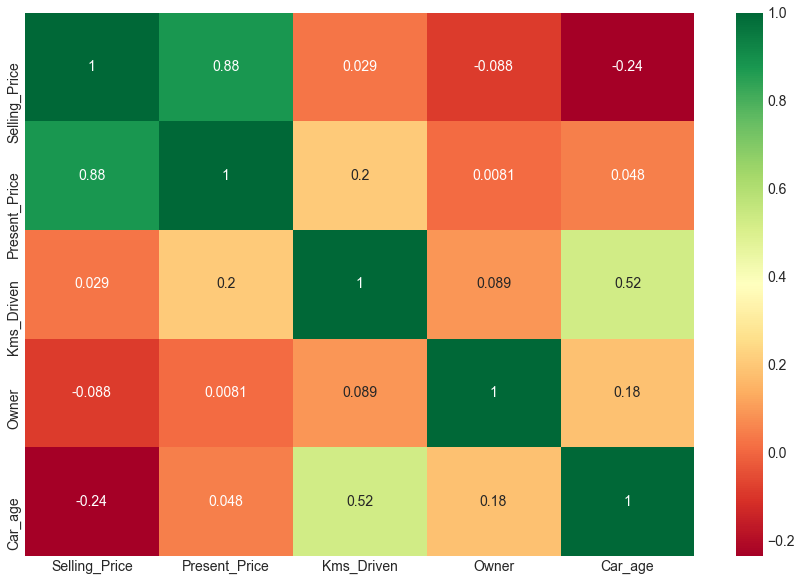

In [15]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

## Train Test Split 

In [16]:
X = df.drop(['Selling_Price'], axis = 1)
y = df['Selling_Price']

In [17]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = state)

##  Encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
ct = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'), [2, 3, 4])
], remainder = 'passthrough')

In [20]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

## Model Buliding 

In [21]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [22]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 score =', r2_score(y_test, y_pred))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE =', mean_absolute_error(y_test, y_pred))

R2 score = 0.9760444374355303
RMSE = 0.8916856146050169
MAE = 0.5477248743518455


In [26]:
# Let's compare actual and predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(20)

,Actual,Predicted
69,14.25,17.38
52,18.00,19.06
244,5.95,5.97
167,0.42,0.53
252,5.40,4.78
243,6.25,5.45
235,9.10,9.21
282,8.25,9.66
283,8.99,8.78
289,10.11,11.25


## Saving Model

In [27]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('ct', ct),
    ('model', xgb)
])

In [28]:
import joblib
joblib.dump(pipe, 'Model')

['Model']

## Prediction for new value 

In [29]:
model = joblib.load('Model')

In [30]:
price = model.predict([[12, 10000, 'Diesel', 'Dealer', 'Automatic', 0, 3]])[0]

In [31]:
round(price, 2)

9.55